In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
#importing libraries

In [2]:
os.environ['KMP_DUPLICATE_LIB_OK']='True'
#Sets an environment variable to prevent duplication issues

In [3]:
train_dir = 'D:\\malware\\malware_dataset\\train'
val_dir = 'D:\\malware\\malware_dataset\\val'
# paths of train and validation directory of the blended dataset from kaggle

In [4]:
img_height, img_width = 300, 300  # image size
batch_size = 32

In [5]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
#data processing starts from here (pre-processing)

In [6]:
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)
#data processing (pre-processing)
 

Found 9868 images belonging to 31 classes.


In [7]:
validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)
# pre-processing ends here (pre-processing)


Found 3879 images belonging to 31 classes.


In [8]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(31, activation='softmax')  # Output layer for 31 classes
])
#CNN model

In [9]:
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
import tensorflow as tf
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.optimizers import SGD

# Create an instance of the SGD optimizer with specific learning rate and momentum
opt = SGD(learning_rate=0.01, momentum=0.9)

# Compile the model with the SGD optimizer
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy',Precision(name='precision'), 
        Recall(name='recall')])

#compiling model in the above code

In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=25,  # Adjust based on your specific needs and early stopping criteria
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)
#Training the model
'''from tensorflow.keras.callbacks import EarlyStopping

# Initialize early stopping callback
# Stop training when there is no improvement in the validation loss for 3 consecutive epochs
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

# Fit the model with the early stopping callback
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=50,  # You can set a higher epoch if you're using early stopping
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[early_stopping]  # Add the early stopping callback here
)'''


Epoch 1/25
308/308 [==============================] - 562s 2s/step - loss: 0.5601 - accuracy: 0.8406 - precision: 0.9038 - recall: 0.7906 - val_loss: 0.8764 - val_accuracy: 0.8301 - val_precision: 0.8684 - val_recall: 0.7854
Epoch 2/25
308/308 [==============================] - 557s 2s/step - loss: 0.5492 - accuracy: 0.8373 - precision: 0.9020 - recall: 0.7893 - val_loss: 0.5349 - val_accuracy: 0.8270 - val_precision: 0.9075 - val_recall: 0.8006
Epoch 3/25
308/308 [==============================] - 577s 2s/step - loss: 0.4744 - accuracy: 0.8583 - precision: 0.9137 - recall: 0.8188 - val_loss: 0.4642 - val_accuracy: 0.8704 - val_precision: 0.9149 - val_recall: 0.8409
Epoch 4/25
308/308 [==============================] - 574s 2s/step - loss: 0.4811 - accuracy: 0.8561 - precision: 0.9099 - recall: 0.8169 - val_loss: 0.4371 - val_accuracy: 0.8835 - val_precision: 0.9204 - val_recall: 0.8595
Epoch 5/25
308/308 [==============================] - 608s 2s/step - loss: 0.4686 - accuracy: 0.8638

"from tensorflow.keras.callbacks import EarlyStopping\n\n# Initialize early stopping callback\n# Stop training when there is no improvement in the validation loss for 3 consecutive epochs\nearly_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)\n\n# Fit the model with the early stopping callback\nhistory = model.fit(\n    train_generator,\n    steps_per_epoch=train_generator.samples // batch_size,\n    epochs=50,  # You can set a higher epoch if you're using early stopping\n    validation_data=validation_generator,\n    validation_steps=validation_generator.samples // batch_size,\n    callbacks=[early_stopping]  # Add the early stopping callback here\n)"

In [13]:
accuracy = model.evaluate(validation_generator)
print(f'Accuracy: {accuracy[1] * 100:.2f}%')
print(f'Precision: {accuracy[2] * 100:.2f}%')
print(f'Recall: {accuracy[3] * 100:.2f}%')
f1_score = 2 * (accuracy[2] * accuracy[3]) / (accuracy[2] + accuracy[3] + tf.keras.backend.epsilon())
print(f'F1 Score: {f1_score:.2f}')
#Evaluating the model on the validation data.

122/122 [==============================] - 36s 290ms/step - loss: 0.3966 - accuracy: 0.9090 - precision: 0.9208 - recall: 0.9018
Accuracy: 90.90%
Precision: 92.08%
Recall: 90.18%
F1 Score: 0.91


In [14]:
model.save('multiclass_classification_model.h5')
#Saving the model.

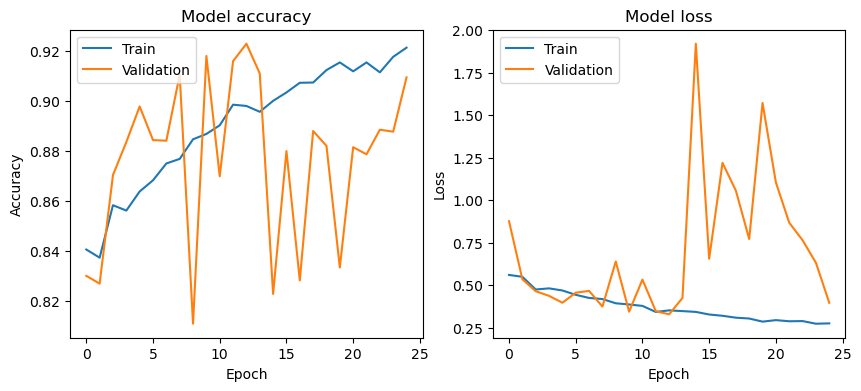

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
